# Sentimental Analsyis : Data Science and NLP for Customer Reviews


In [2]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sundeep\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sundeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sundeep\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sundeep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Users\Sundeep\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
#Read in from pandas
hotelDf = pandas.read_csv('reviews_calgary.csv')
hotelDf.columns=['filePath','hotelName','reviewColumn','ratingScore','groundTruth']
hotelDf = hotelDf.drop(columns = ['filePath'])

In [4]:
hotelDf.head()

,hotelName,reviewColumn,ratingScore,groundTruth
0,Calgary Airport Marriott In-Terminal Hotel,"""We were excited to stay at the new Marriott i...",5,positive
1,Calgary Airport Marriott In-Terminal Hotel,"""We were not able to make our Victoria connect...",5,positive
2,Calgary Airport Marriott In-Terminal Hotel,"""Rooms are very modern looking with great king...",5,positive
3,Calgary Airport Marriott In-Terminal Hotel,"""We stayed just one night at the Marriott and ...",4,positive
4,Calgary Airport Marriott In-Terminal Hotel,"""The Marriot is across from the old Delta. Bot...",5,positive


In [5]:
hotelDf['groundTruth'].value_counts()

positive    9434
negative    3249
Name: groundTruth, dtype: int64

In [6]:
hotelDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12683 entries, 0 to 12682
Data columns (total 4 columns):
hotelName       12683 non-null object
reviewColumn    12683 non-null object
ratingScore     12683 non-null int64
groundTruth     12683 non-null object
dtypes: int64(1), object(3)
memory usage: 396.4+ KB


In [7]:
review_counts = hotelDf['hotelName'].value_counts()
review_counts = dict(review_counts)
hotelDf['review_counts'] = hotelDf['hotelName'].apply(lambda x: review_counts[x])

In [8]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []

    for sentence in sentences:
        ss = sid.polarity_scores(sentence)
        pdlist.append(ss['compound'])
        
    return pdlist


In [9]:
reviews = hotelDf['reviewColumn'].values
Vader_sentiment_scores = evalSentences(reviews)
reviews = hotelDf['reviewColumn'].values
hotelDf['Vader_score'] = Vader_sentiment_scores

In [10]:
hotelDf.head()

,hotelName,reviewColumn,ratingScore,groundTruth,review_counts,Vader_score
0,Calgary Airport Marriott In-Terminal Hotel,"""We were excited to stay at the new Marriott i...",5,positive,209,0.9830
1,Calgary Airport Marriott In-Terminal Hotel,"""We were not able to make our Victoria connect...",5,positive,209,0.9412
2,Calgary Airport Marriott In-Terminal Hotel,"""Rooms are very modern looking with great king...",5,positive,209,0.6409
3,Calgary Airport Marriott In-Terminal Hotel,"""We stayed just one night at the Marriott and ...",4,positive,209,0.4957
4,Calgary Airport Marriott In-Terminal Hotel,"""The Marriot is across from the old Delta. Bot...",5,positive,209,0.9735


In [11]:
hotelDf.hotelName.value_counts().head()

Calgary Marriott Downtown Hotel       643
The Westin Calgary                    622
Sheraton Suites Calgary Eau Claire    536
The Fairmont Palliser                 533
Hyatt Regency Calgary                 492
Name: hotelName, dtype: int64

In [12]:
hotels_avg_data = hotelDf.groupby('hotelName').mean()

In [13]:
hotels_avg_data.head()

,ratingScore,review_counts,Vader_score
hotelName,,,
11th Street Lodging B&amp;B,4.500000,12.0,0.807492
Acclaim Hotel Calgary Airport,4.072165,97.0,0.741924
Aloft Calgary University,4.214689,177.0,0.812512
Along River Ridge,4.875000,56.0,0.945861
Ambassador Motor Inn,2.562500,16.0,0.248481


### Top 5 Hotels 

In [14]:
hotels_avg_data.sort_values(by=['ratingScore'], ascending=False).head(5)

,ratingScore,review_counts,Vader_score
hotelName,,,
Brother Li Homestay,5.000000,2.0,0.957100
Bonaventure Bed and Breakfast,4.937500,16.0,0.952269
Novel Bed and Breakfast,4.923077,13.0,0.947500
Along River Ridge,4.875000,56.0,0.945861
"English Bed, Breakfast and Day Spa",4.848485,33.0,0.886221


In [15]:
hotels_avg_data.sort_values(by=['Vader_score'], ascending=False).head(5)

,ratingScore,review_counts,Vader_score
hotelName,,,
Regal Suites - Riverfront,3.750000,4.0,0.982125
River Lee Executive Bed &amp; Breakfast,4.636364,11.0,0.964745
Brother Li Homestay,5.000000,2.0,0.957100
Bonaventure Bed and Breakfast,4.937500,16.0,0.952269
Novel Bed and Breakfast,4.923077,13.0,0.947500


### Bottom-5 Hotels

In [16]:
hotels_avg_data.sort_values(by=['ratingScore'], ascending=False).tail()

,ratingScore,review_counts,Vader_score
hotelName,,,
Red Carpet Inn,2.052632,19.0,0.203258
Ramada Limited Calgary Northwest,1.809211,152.0,-0.046259
Town &amp; Country Motor Hotel,1.300000,10.0,-0.112840
Olympia Motel,1.090909,11.0,-0.025009
O Stays Waterfront,1.000000,6.0,0.173583


In [17]:
hotels_avg_data.sort_values(by=['Vader_score'], ascending=False).tail()

,ratingScore,review_counts,Vader_score
hotelName,,,
O Stays Waterfront,1.000000,6.0,0.173583
Olympia Motel,1.090909,11.0,-0.025009
Canadas Best Value Inn Chinook Station,2.079208,202.0,-0.045217
Ramada Limited Calgary Northwest,1.809211,152.0,-0.046259
Town &amp; Country Motor Hotel,1.300000,10.0,-0.112840


### Comparision for top-5 and bottom-5 for both ranking methods:

We can see that most of the top-5 and bottom-5 hotels are matching for vader & rating score. Although there is differnce in the rankings but top & bottom 5 hotels are almost same. (3 Hotels matching in Top Hotels & 4 Hotels matching in Bottom hotels)

Also, in both the cases while ranking hotels by **average rating scores**, we can observe a clear difference in rankings for the hotels with less number of reviews which is casuing slight difference in rakings for rating & vader score methods. (Hotels with less number of reviews rating score ranking is dominating)

Overall we can say that Vader using lexicon and rule-based sentiment analysis is making good predictons for very positive and very negative reviews.

### Q2. Frequency Analysis

In [89]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf,k=500):
    reviews = hotelDf['reviewColumn'].values
    
    from nltk.corpus import stopwords
    stop = set(stopwords.words('english'))
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
#     finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','reviewColumn','ratingScore','groundTruth','Vader_score']].join(freqReviewDf)
    return topk, finaldf

In [96]:
topk, finaldf = dataFrameTransformation(hotelDf, k=500)
topk[:10]

[('hotel', 15062),
 ('room', 13731),
 ('staff', 7472),
 ('stay', 7142),
 ('great', 6484),
 ('good', 6184),
 ('clean', 5309),
 ('calgary', 5285),
 ('breakfast', 5273),
 ('would', 4921)]

In [97]:
finaldf.head(3)

,hotelName,reviewColumn,ratingScore,groundTruth,Vader_score,hotel,room,staff,stay,great,...,variety,using,real,elevators,maintained,adequate,beyond,choices,nthere,blocks
0,Calgary Airport Marriott In-Terminal Hotel,"""We were excited to stay at the new Marriott i...",5,positive,0.9830,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Calgary Airport Marriott In-Terminal Hotel,"""We were not able to make our Victoria connect...",5,positive,0.9412,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Calgary Airport Marriott In-Terminal Hotel,"""Rooms are very modern looking with great king...",5,positive,0.6409,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [126]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewColumn'):
    from nltk.corpus import stopwords
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('would')
    stop.add('calgary')
#     stop.add('told')
#     stop.add('said')
#     stop.add('called')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

Staff is not considerered as a stop word since it helps us to identify how many customers are mentiioning about staff in positive and negative reviews. This gives us their overall opinion on the staff.

In [127]:
topkGroundPos = getTopK(df=finaldf, k=50, label_value='positive')
topkGroundPos

[('staff', 5904),
 ('great', 5787),
 ('good', 4774),
 ('clean', 4153),
 ('breakfast', 4021),
 ('nice', 3588),
 ('friendly', 3034),
 ('stayed', 3003),
 ('comfortable', 2911),
 ('service', 2899),
 ('location', 2647),
 ('well', 2592),
 ('one', 2413),
 ('downtown', 2062),
 ('night', 2053),
 ('helpful', 2028),
 ('pool', 1949),
 ('also', 1890),
 ('excellent', 1855),
 ('time', 1806),
 ('restaurant', 1779),
 ('nthe', 1758),
 ('bed', 1750),
 ('desk', 1718),
 ('area', 1714),
 ('food', 1688),
 ('parking', 1640),
 ('airport', 1580),
 ('free', 1567),
 ('close', 1544),
 ('front', 1542),
 ('get', 1542),
 ('really', 1530),
 ('check', 1474),
 ('place', 1442),
 ('restaurants', 1297),
 ('recommend', 1290),
 ('like', 1283),
 ('beds', 1267),
 ('could', 1235),
 ('quot', 1213),
 ('day', 1201),
 ('back', 1195),
 ('always', 1156),
 ('hot', 1150),
 ('definitely', 1136),
 ('best', 1080),
 ('business', 1069),
 ('floor', 1053),
 ('walk', 1052)]

In [128]:
topkGroundNeg = getTopK(df=finaldf, k=50, label_value='negative')
topkGroundNeg

[('staff', 1568),
 ('one', 1534),
 ('night', 1506),
 ('good', 1410),
 ('breakfast', 1252),
 ('desk', 1222),
 ('quot', 1164),
 ('clean', 1156),
 ('get', 1142),
 ('stayed', 1120),
 ('front', 1120),
 ('bed', 961),
 ('could', 947),
 ('service', 883),
 ('nice', 880),
 ('nthe', 856),
 ('like', 854),
 ('time', 851),
 ('place', 779),
 ('check', 777),
 ('even', 769),
 ('floor', 717),
 ('back', 703),
 ('great', 697),
 ('parking', 696),
 ('bathroom', 687),
 ('location', 678),
 ('day', 668),
 ('also', 649),
 ('well', 626),
 ('friendly', 609),
 ('area', 599),
 ('small', 590),
 ('door', 587),
 ('pool', 583),
 ('next', 580),
 ('got', 572),
 ('booked', 570),
 ('two', 556),
 ('first', 539),
 ('never', 537),
 ('people', 536),
 ('really', 534),
 ('hot', 519),
 ('comfortable', 511),
 ('work', 505),
 ('morning', 496),
 ('asked', 494),
 ('food', 492),
 ('shower', 491)]

## Insights about Top Ranked Positive & Negative review words:

In positive reviews we can find some of the top frequent words as - Great/Good/clean/nice/comfortable/excellent etc., as expected. 

But, Interestingly even in the negative reviews we can find same words in the top list - (Good/clean/nice etc.,). This might be because customers are using negation of these words like (Not Good/wasn't very good/Not clean etc.,) which cannot captured if we are doing single word analysis. (Vader can handle these because of the lexicon and rule based analysis) 

Also, in both the cases (positive and negative) we can find some other most frequent words like Staff/breakfast/parking/service/food etc., which shows us what customers are more concerned about. By performing similar analysis for an individual hotel we can uderstand about these things in detail (whether customers are positive or negative about these different things)

In [129]:
tagger = PerceptronTagger()

pos_tag = tagger.tag

In [130]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.

# We will consider Noun Phrase Chunking and we search for chunks corresponding to an individual noun phrase.
# Rule states that whenever the chunk finds an Proper Noun (NN) followed by any number of adjectives (JJ) and 
# then terminated with a noun (NN) then the Noun Phrase(NP) chunk should be formed
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [131]:
# Create phrase tree
# Chunking is a process of extracting phrases from unstructured text.
# Chunking works on top of POS tagging, it uses pos-tags as input and provides chunks as output.
# Chunking is very important when you want to extract information from text such as Locations, Person Names etc.
chunker = nltk.RegexpParser(grammar)


In [132]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [133]:
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [134]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, k=500):
    reviews = hotelDf['reviewColumn'].values
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    freqReviewDf.columns = dfName
    finaldf = hotelDf[['hotelName','reviewColumn','ratingScore','groundTruth','Vader_score']].join(freqReviewDf)
    return topk, finaldf

In [135]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf)

In [136]:
finaldf_phrase.head()

,hotelName,reviewColumn,ratingScore,groundTruth,Vader_score,front desk,hot tub,downtown calgari,great locat,front desk staff,...,busi center,nearbi restaur,hair dryer,tran canada highway,waffl maker,room price,riversid inn,larg walk,nice clean,numer time
0,Calgary Airport Marriott In-Terminal Hotel,"""We were excited to stay at the new Marriott i...",5,positive,0.9830,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Calgary Airport Marriott In-Terminal Hotel,"""We were not able to make our Victoria connect...",5,positive,0.9412,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Calgary Airport Marriott In-Terminal Hotel,"""Rooms are very modern looking with great king...",5,positive,0.6409,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Calgary Airport Marriott In-Terminal Hotel,"""We stayed just one night at the Marriott and ...",4,positive,0.4957,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Calgary Airport Marriott In-Terminal Hotel,"""The Marriot is across from the old Delta. Bot...",5,positive,0.9735,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
topk_phrase[:10]

[('front desk', 1062),
 ('hot tub', 446),
 ('downtown calgari', 318),
 ('great locat', 302),
 ('front desk staff', 300),
 ('nthe room', 259),
 ('calgari tower', 224),
 ('room servic', 217),
 ('great place', 206),
 ('comfort bed', 200)]

In [138]:
def topknounphrases(df, label_value='positive',k=50):
    hotelDf = df[df['groundTruth'] == label_value]
    reviews = hotelDf['reviewColumn'].values
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)
    
    return topk

In [139]:
topknounphrases(hotelDf,label_value='positive',k=50)

[('front desk', 546),
 ('hot tub', 325),
 ('downtown calgari', 273),
 ('great locat', 255),
 ('front desk staff', 212),
 ('calgari tower', 206),
 ('great place', 192),
 ('comfort bed', 180),
 ('nthe room', 175),
 ('hotel staff', 153),
 ('great stay', 152),
 ('room servic', 151),
 ('breakfast buffet', 141),
 ('great hotel', 141),
 ('friendli staff', 139),
 ('nthe hotel', 137),
 ('first time', 135),
 ('good valu', 129),
 ('nice hotel', 127),
 ('next time', 127),
 ('pool area', 118),
 ('free breakfast', 118),
 ('good locat', 117),
 ('short walk', 114),
 ('hotel room', 110),
 ('night stay', 109),
 ('minut walk', 108),
 ('great servic', 105),
 ('easi access', 104),
 ('great view', 99),
 ('custom servic', 99),
 ('busi trip', 95),
 ('next morn', 95),
 ('good size', 94),
 ('continent breakfast', 91),
 ('free park', 91),
 ('water slide', 91),
 ('bow river', 90),
 ('help staff', 89),
 ('nice touch', 89),
 ('next day', 86),
 ('calgari stamped', 86),
 ('complimentari breakfast', 81),
 ('calgari ai

In [140]:
topknounphrases(hotelDf,label_value='negative',k=50)

[('front desk', 516),
 ('credit card', 142),
 ('hot tub', 121),
 ('next morn', 89),
 ('front desk staff', 88),
 ('nthe room', 84),
 ('next day', 79),
 ('park lot', 74),
 ('hotel room', 73),
 ('first night', 67),
 ('room servic', 66),
 ('hot water', 59),
 ('good locat', 58),
 ('free breakfast', 55),
 ('custom servic', 55),
 ('air condition', 50),
 ('night stay', 48),
 ('great locat', 47),
 ('holiday inn', 47),
 ('downtown calgari', 45),
 ('smoke room', 45),
 ('nthe hotel', 44),
 ('first time', 42),
 ('continent breakfast', 42),
 ('busi travel', 41),
 ('non smoke room', 39),
 ('good thing', 38),
 ('queen bed', 37),
 ('next time', 37),
 ('hotel staff', 37),
 ('staff member', 36),
 ('pool area', 36),
 ('key card', 34),
 ('second night', 33),
 ('desk clerk', 32),
 ('minut walk', 32),
 ('long time', 32),
 ('second floor', 31),
 ('nice hotel', 31),
 ('breakfast room', 31),
 ('ice machin', 31),
 ('good valu', 31),
 ('busi trip', 31),
 ('complimentari breakfast', 31),
 ('differ room', 31),
 ('c

## Insights about Top Ranked Positive & Negative review Noun Phrases:

Positive: In positive reviews we have top phrases as "downtown calgari"/"great location" etc. which shows the general importance of location that is giving positive reviews. Similarly in negative reviews "credit card"/"parking lot" has frequent mentions.

Interestingly, both in positive and negative cases we can find that we have common phrases like **front desk/hot tub/room service** etc. Since Top Key/Noun phrases indicates the most frequent terms that the customers are mentioning in the reviews, In our case we can say that these the things that the customers are more concerned. Like explained previously they might be positive and negative mentions in both the cases respectively.

In our previous case, while analyzing the individual words **staff** was identified most frequent in both positive and negative reviews. But from the phrasal analysis we can further say that it is about **front desk staff** that we have more mentions.


All the above phrases/words impotance can be better explored by calculating Mutual information and PMI.

## Q3. Mutual Information

In [141]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [142]:
miScoredf = getMI(topk, finaldf)

In [147]:
miScoredf.head(50)

,Word,MI Score
4,great,0.028662
282,dirty,0.026815
114,told,0.025522
125,said,0.018058
42,excellent,0.016005
185,called,0.013587
408,poor,0.013266
135,old,0.013041
130,asked,0.012880
1,room,0.011559


Using mutual information (MI) with ground truth sentiment we can see that the top-50 most sentiment-bearing words include terms like great/dirty/excellent etc. These words are self explainatory because they cleary weighs for either a positive or negative sentiment. (Considering non negation cases)

Interestingly, we can also find words like **told/said/called** etc which looks like stop words. But the reason might be that these words might be predictive for negative cases because the words shows complaining behaviour. We can confirm this by checking for their PMI in the negative cases.

In [43]:
miScoredf_phrase = getMI(topk_phrase, finaldf_phrase)

In [125]:
miScoredf_phrase.head(50)

,Word,MI Score
17,credit card,0.007879
0,front desk,0.005631
92,air condition,0.002621
161,non smoke room,0.002467
25,great stay,0.002315
198,key card,0.002156
121,smoke room,0.002130
8,great place,0.001885
6,calgari tower,0.001742
29,park lot,0.001693


We can find the phrases like "credit card"/ "front desk" / "non smoke room" with high mutual information - impling that they contribute more for predicting the correct class (Also, these words are self explainatory Eg: Credit card - Customers complaining about it (Negative)).

Also, we can see that MI values for phrases are lower than individual words this might be because MI considers frequency while making calculations and since similar phrases frequencies will be generally lower they corresponds to lower MI

## Q4. Pointwise Mutual Information

In [45]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if px or py == 0:
                pmi = math.log((pxy+0.0001)/(px*py+0.0001))
            
            elif pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py+0.0001))
            
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [46]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    
    if px*py == 0:
        pmi = math.log((pxy+0.0001)/(px*py+0.0001))
        
        return pmi
    elif pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py+0.0001))
        return pmi
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [47]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, label_column='groundTruth', topk=topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [48]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:32<00:00, 15.21it/s]


In [144]:
#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
220,highly,0.261977
119,enjoyed,0.244841
380,delicious,0.241703
142,wonderful,0.241383
155,perfect,0.235798
263,awesome,0.233271
197,loved,0.233053
202,beautiful,0.230314
277,river,0.226056
128,amazing,0.221182


for the top PMI words in the positive reviews we can find words like "spacious"/ "river" / "delicous" etc which mentions about the location, ambience or food which are accounting for the positive reviews.

In [149]:
#Sorted top pmi words for negative reviews
pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
282,dirty,1.264574
466,smoking,1.109784
408,poor,1.105982
114,told,1.033153
457,sheets,1.005240
393,credit,1.004029
429,toilet,0.975498
359,someone,0.942464
125,said,0.938461
242,card,0.914747


As hypothesised previously words like said/told/called etc which have **high MI also have high PMI in the negative cases**. This confirms about the complaining behaviour and they should not be considered as stop words.

In [150]:
pmiposlist_phrase, pmineglist_phrase, pmidf_phrase = pmiForAllCal(finaldf_phrase, topk=topk_phrase)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:00<00:00,  8.16it/s]


In [151]:
#Sorted top pmi words for positive reviews
pmiposlist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
397,super clean,0.295942
415,great select,0.295942
226,stephen avenu,0.295942
468,execut loung,0.295942
461,amaz staff,0.295942
247,excel valu,0.295942
208,beauti hotel,0.295942
354,excel place,0.295942
479,wonder time,0.295942
400,coffe shop,0.295942


For top positive phrases in PMI, we can find many phrases which are not previously observed in topKphrases with ground truth case. This might be because as the PMI is not sensitive to frequency if they occur in all of the positive cases (They get same PMI which can seen in above table). So, as these phrases are only occuring in the Positive cases they getting the same and highest PMI values. 

Interestingly, we can see that this type of similar values in PMI is not observed in neagtive cases which means that these words might also have appeared in few positive cases, which decreases the negative PMI values.

In [152]:
#Sorted top pmi words for negative reviews
pmineglist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
485,bed bug,1.281873
456,bed sheet,1.244132
454,secur deposit,1.236752
198,key card,1.228384
161,non smoke room,1.199396
17,credit card,1.193451
121,smoke room,1.127076
242,plu side,1.115055
92,air condition,1.068928
268,bathroom floor,1.061811


In [56]:
hotels_avg_data.sort_values(by=['ratingScore'], ascending=False).head(3)

,ratingScore,review_counts,Vader_score
hotelName,,,
Brother Li Homestay,5.000000,2.0,0.957100
Bonaventure Bed and Breakfast,4.937500,16.0,0.952269
Novel Bed and Breakfast,4.923077,13.0,0.947500


In [187]:
df_topRatedHotel = finaldf[finaldf['hotelName']== 'Bonaventure Bed and Breakfast']
df_topRatedHotel_phrases = finaldf_phrase[finaldf_phrase['hotelName']== 'Bonaventure Bed and Breakfast']

In [188]:
df_topRatedHotel.head(3)

,hotelName,reviewColumn,ratingScore,groundTruth,Vader_score,hotel,room,staff,stay,great,...,variety,using,real,elevators,maintained,adequate,beyond,choices,nthere,blocks
11590,Bonaventure Bed and Breakfast,"""We stayed in this first rate B &amp; B in the...",5,positive,0.9891,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11591,Bonaventure Bed and Breakfast,"""This is the best B&amp;B we have ever stayed ...",5,positive,0.9931,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11592,Bonaventure Bed and Breakfast,"""Bonaventure is a lovely B&amp;B made perfect ...",5,positive,0.9912,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [189]:
hotels_avg_data.sort_values(by=['ratingScore'], ascending=False).tail(3)

,ratingScore,review_counts,Vader_score,Variance_ratingscore,Variance_Vaderscore
hotelName,,,,,
Town &amp; Country Motor Hotel,1.300000,10.0,-0.112840,0.455556,0.676837
Olympia Motel,1.090909,11.0,-0.025009,0.090909,0.513756
O Stays Waterfront,1.000000,6.0,0.173583,0.000000,0.585528


In [190]:
df_leastRatedHotel = finaldf[finaldf['hotelName']== 'Olympia Motel']
df_leastRatedHotel_phrases = finaldf_phrase[finaldf_phrase['hotelName']== 'Olympia Motel']

In [191]:
df_leastRatedHotel.head(3)

,hotelName,reviewColumn,ratingScore,groundTruth,Vader_score,hotel,room,staff,stay,great,...,variety,using,real,elevators,maintained,adequate,beyond,choices,nthere,blocks
6866,Olympia Motel,"""Was looking online for an overnight stay in C...",1,negative,0.3311,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6867,Olympia Motel,"""The most disgusting hotel I have ever seen, a...",1,negative,-0.5697,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6868,Olympia Motel,"""So I\\'m not sure how much the \\'revamped an...",1,negative,-0.8739,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
pmiposlist_topHotel, pmineglist_topHotel, pmidf = pmiForAllCal(df_topRatedHotel)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:09<00:00, 52.81it/s]


In [193]:
pmiposlist_topHotel[:5]

,word,pmi
0,hotel,0.0
1,room,0.0
2,staff,0.0
3,stay,0.0
4,great,0.0


In [194]:
pmineglist_topHotel[:5]

,word,pmi
0,hotel,0.0
1,room,0.0
2,staff,0.0
3,stay,0.0
4,great,0.0


In [195]:
# pmiposlist_phrase, pmineglist_phrase, pmidf_phrase = pmiForAllCal(finaldf_phrase, topk=topk_phrase)
pmiposlist_topHotel, pmineglist_topHotel, pmidf = pmiForAllCal(df_topRatedHotel_phrases, topk=topk_phrase)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:09<00:00, 52.94it/s]


In [196]:
pmiposlist_topHotel[:5]

,word,pmi
0,front desk,0.0
1,hot tub,0.0
2,downtown calgari,0.0
3,great locat,0.0
4,front desk staff,0.0


In [197]:
pmineglist_topHotel[:5]

,word,pmi
0,front desk,0.0
1,hot tub,0.0
2,downtown calgari,0.0
3,great locat,0.0
4,front desk staff,0.0


In [198]:
pmiposlist_topHotel, pmineglist_topHotel, pmidf = pmiForAllCal(df_leastRatedHotel)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:09<00:00, 52.17it/s]


In [199]:
pmiposlist_topHotel[:5]

,word,pmi
0,hotel,0.0
1,room,0.0
2,staff,0.0
3,stay,0.0
4,great,0.0


In [201]:
pmineglist_topHotel[:5]

,word,pmi
0,hotel,0.0
1,room,0.0
2,staff,0.0
3,stay,0.0
4,great,0.0


In [202]:
pmiposlist_leastHotel, pmineglist_leastHotel, pmidf = pmiForAllCal(df_leastRatedHotel_phrases, topk=topk_phrase)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:09<00:00, 54.54it/s]


In [203]:
pmiposlist_leastHotel[:5]

,word,pmi
0,front desk,0.0
1,hot tub,0.0
2,downtown calgari,0.0
3,great locat,0.0
4,front desk staff,0.0


In [204]:
pmineglist_leastHotel[:5]

,word,pmi
0,front desk,0.0
1,hot tub,0.0
2,downtown calgari,0.0
3,great locat,0.0
4,front desk staff,0.0


we are unable to get any hotel-specific insights by considering top and least rated hotels because, In both the cases we have only either positive or negative cases only. Hence,

**Top Hotel - All Positive Reviews only:**

Case 1 (PMI_positive_list): In this case, when we are calculating PMI_positive_list then as P(Y) = 1 [ probability of class "Positive" =1 ] and P(X,Y) & P(X) are same (because probability of occurance of word is same as probability of occurance of word in class positive) and hence PMI will be '0' for each word in this case.

Case 2: (PMI_negative_list): In this case, since P(Y) = 0 ([ probability of class "negative" = 0 ]) and P(X,Y) will be zero and hence in the calculation a small correction of 0.0001 is added (To avoid floating division error) and we get PMIs as zero since all the terms are near zeros.

Similarly when we calculate for the least rated hotel, as all the reviews are zeros we are getting zero PMI values in all the cases.

## Q5. General Plots

In [65]:
def getHistogram(measure, title):
    if measure=='both':
        x = [finaldf['ratingScore'].values/5]
        y = [finaldf['Vader_score'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

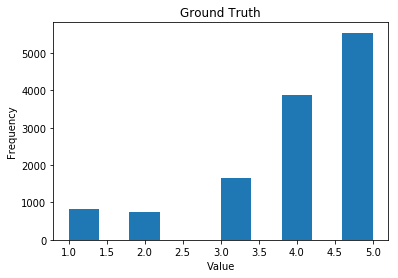

In [66]:
getHistogram('ratingScore', 'Ground Truth')

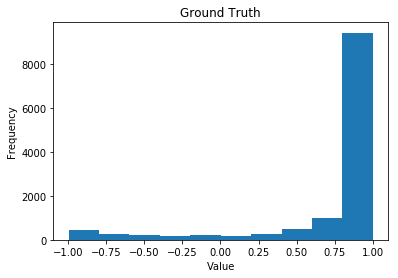

In [67]:
getHistogram('Vader_score', 'Ground Truth')

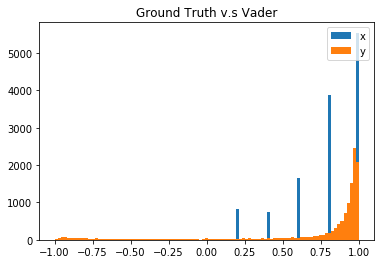

In [68]:
getHistogram('both', 'Ground Truth v.s Vader')

In [207]:
len(hotelDf[(hotelDf['Vader_score'] < 0)])

1280

In [212]:
len(hotelDf[(hotelDf['groundTruth'] == 'negative')])

3249

In [214]:
len(hotelDf[(hotelDf['ratingScore'] <= 3)])

3249

Above plots show that distribution for vader and rating scores is almost similar. One Interesting observation from the plot is that, we have very few ratings with vader_scores less than zero although there are many negative reviews (Ground truth)


Since ratingScore <= 3 (corresponding to negative reviews), we have very few reviews where the vader predicted compound scores is less zero. This shows that vader is unable to predict these negative reviews. This might be because of the length the of reviews or the complexity of words in the reviews which makes vader to predict them as slightly positive reviews.

Also, another possibilty is that as we are considering ratingScore <= 3 as negatives in ground truth, In these cases customer might be acutaully neutral or slightly positive (as vader is predicting).

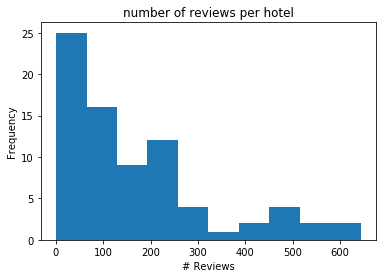

In [215]:
plt.hist(finaldf['hotelName'].value_counts())
plt.title('number of reviews per hotel')
plt.xlabel("# Reviews")
plt.ylabel("Frequency")
fig = plt.gcf()

We can observe that most of the hotels have reviews less than 200. And very few hotels with very high reviews. (These might be the few famous hotels and hence they are getting more customers/reviews)

In [216]:
tp5gthotel = hotels_avg_data.sort_values(by=['ratingScore'], ascending=False).head()
# tp5gthotel['hotelName'].values
tp5gthotel

,ratingScore,review_counts,Vader_score,Variance_ratingscore,Variance_Vaderscore
hotelName,,,,,
Brother Li Homestay,5.000000,2.0,0.957100,0.000000,0.000063
Bonaventure Bed and Breakfast,4.937500,16.0,0.952269,0.062500,0.003378
Novel Bed and Breakfast,4.923077,13.0,0.947500,0.076923,0.002905
Along River Ridge,4.875000,56.0,0.945861,0.111364,0.010659
"English Bed, Breakfast and Day Spa",4.848485,33.0,0.886221,0.320076,0.117906


### Box plots

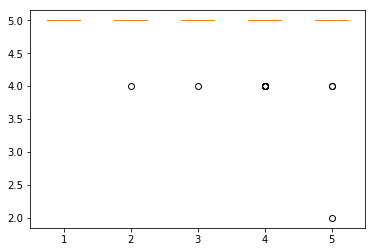

In [217]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotels_avg_data.sort_values(by=['ratingScore'], ascending=False).head()
tp5gthotel = tp5gthotel.reset_index()
tp5gthotel['hotelName'].values

hampton = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
towneplace = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
hiltonGarden = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
homewood = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
courtyard = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

data = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

In this box plots for top 5 hotels using ground truth star rating we can observe that all these hotels have median ratings as 5. Since in our case all the top 5 hotels have almost rating 5 in all the reviews except 1 or 2 reviews which has rating 4, hence clearly the median is 5 and the ratings 4 are clear outliers in this case with out any other spread in the data.

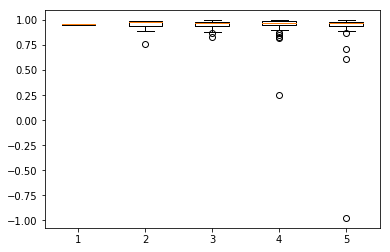

In [72]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotels_avg_data.sort_values(by=['ratingScore'], ascending=False).head(5)
tp5gthotel = tp5gthotel.reset_index()
tp5gthotel['hotelName'].values

hampton = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['Vader_score']
towneplace = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['Vader_score']
hiltonGarden = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['Vader_score']
homewood = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['Vader_score']
courtyard = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['Vader_score']

data = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

For all the top 5 hotels, we can clearly see that Vader is predicting higher values close to 1. In case of last hotel we can see the spread of scores is very high with many outliers. It is clearly seen that although since there is one review with rating 2 here vader is predicting negative values for them close to -1. Similarly for hotels 3 & 4, since they have more reviews we can see there is a clear spread for vader predicted scores. 

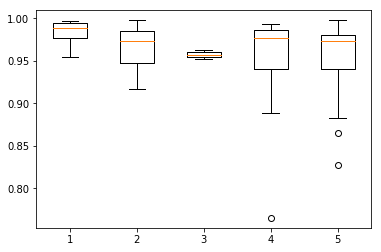

In [73]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotels_avg_data.sort_values(by=['Vader_score'], ascending=False).head(5)
tp5gthotel = tp5gthotel.reset_index()
tp5gthotel['hotelName'].values

hampton = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['Vader_score']
towneplace = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['Vader_score']
hiltonGarden = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['Vader_score']
homewood = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['Vader_score']
courtyard = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['Vader_score']

data = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

For all the top 5 hotels with vaderscores, we can clearly see that Vader is predicting values is close to 1. In case of last hotel we can see the spread of scores is from 0.85 to 1.0 . Comparing only the medians for all the scores we can see that vader is making good median predictions in the range of 0.96-0.97 for these reviews. (Actual avg reviews ratings is close to 5).

#### Mean and Variance of the ground truth and Vader sentiment scores for the top-5 ranked hotels according to star rating

In [74]:
hotels_avg_data['Variance_ratingscore'] = hotelDf.groupby('hotelName').var().ratingScore
hotels_avg_data['Variance_Vaderscore'] = hotelDf.groupby('hotelName').var().Vader_score

In [75]:
hotels_avg_data.sort_values(by=['ratingScore'], ascending=False).head(5)

,ratingScore,review_counts,Vader_score,Variance_ratingscore,Variance_Vaderscore
hotelName,,,,,
Brother Li Homestay,5.000000,2.0,0.957100,0.000000,0.000063
Bonaventure Bed and Breakfast,4.937500,16.0,0.952269,0.062500,0.003378
Novel Bed and Breakfast,4.923077,13.0,0.947500,0.076923,0.002905
Along River Ridge,4.875000,56.0,0.945861,0.111364,0.010659
"English Bed, Breakfast and Day Spa",4.848485,33.0,0.886221,0.320076,0.117906


Which do you nd more informative, the boxplots or the mean and variance, or are they equally informative? Why?

Box plots are more informative because they give information about the spread of the data (1st quartile/3rd quartile/median information). Since in our case we have skewed data (Review ratings/Vader_scores) variance is not a good measure of the spread. Also, it gives information about the outliers. Overall Boxplots helps to compare spread of vader and rating scores for different hotels in a better way.

### Scatterplots and heatmaps

Text(0.5,0,'Vader Score')

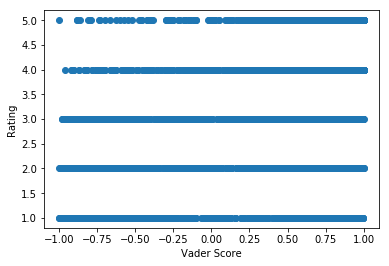

In [76]:
y = finaldf['ratingScore'].values
x = finaldf['Vader_score'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [77]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0,0.5,'Rating')

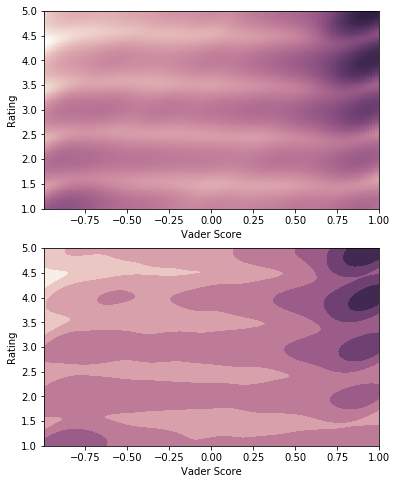

In [78]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

Do you notice anything
interesting? What does this tell you about star ratings vs. Vader sentiment scores?
What does this tell you about human ratings and/or Vader sentiment analysis?


from the above plots we can see that, In some cases even the rating score is 5 vader is predicting it to be negative.  It might happen that user gave aa review 5 but might have given a small complaint or suggestion which is causing vader to give negative predictions. Also, This might be because of the slightly sarcastic reviews, which vader is getting confused. Similarly this might happen when the review rating score is 1 (Sarcastic reviews)

Overall we can see that for rating scores of 4/5 vader is predicting many of them to have compound score of 1.0 (clear positive). May be becasue user might have wrirtten a positive review but his rating might be 4 which is possible in most of the cases.

For the clear positive 4/5 and clear negative 1 rating scores vader is giving correct predictions.

In [80]:
finaldf['len_review'] = finaldf['reviewColumn'].apply(lambda x: len(x))
finaldf.head()

,hotelName,reviewColumn,ratingScore,groundTruth,Vader_score,hotel,room,staff,stay,great,...,using,real,elevators,maintained,adequate,beyond,choices,nthere,blocks,len_review
0,Calgary Airport Marriott In-Terminal Hotel,"""We were excited to stay at the new Marriott i...",5,positive,0.9830,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,967
1,Calgary Airport Marriott In-Terminal Hotel,"""We were not able to make our Victoria connect...",5,positive,0.9412,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,367
2,Calgary Airport Marriott In-Terminal Hotel,"""Rooms are very modern looking with great king...",5,positive,0.6409,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,550
3,Calgary Airport Marriott In-Terminal Hotel,"""We stayed just one night at the Marriott and ...",4,positive,0.4957,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,397
4,Calgary Airport Marriott In-Terminal Hotel,"""The Marriot is across from the old Delta. Bot...",5,positive,0.9735,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,425


Text(0.5,0,'Len of review')

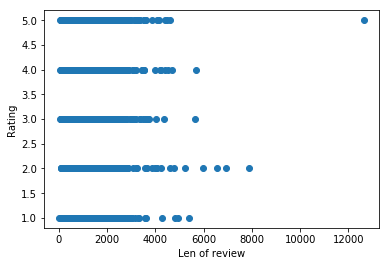

In [81]:
y = finaldf['ratingScore'].values
x = finaldf['len_review'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Len of review')

When we consider rating score we cannot ientify any clear trends. The distribution of words vs. ratings is almost similar. For one of the very positive review the length is extremely high which can be observed.

In [82]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0,0.5,'Rating')

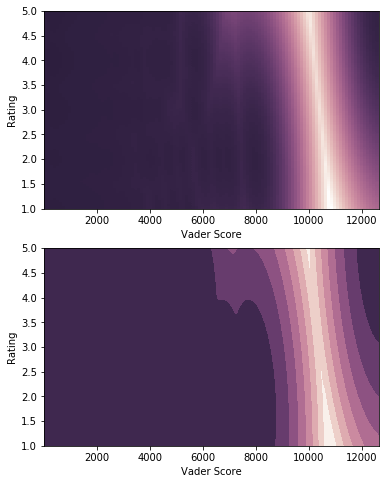

In [83]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

Text(0.5,0,'Len of review')

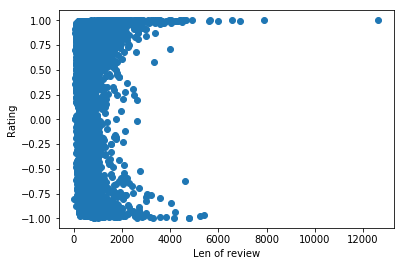

In [84]:
y = finaldf['Vader_score'].values
x = finaldf['len_review'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Len of review')

Although there is not any clear trends we can say that for more positive or more negative reviews Customers are writing very lengthy reviews which can be seen from above plots for the vader scores. Since vader gives continues scores from -1 to 1 depending on the sentiment this is showing us better trends other than descrete rating scores plots.

In [85]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0,0.5,'Rating')

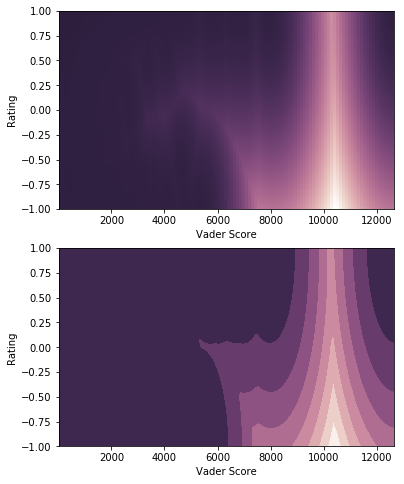

In [86]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

Text(0.5,0,'Number of review')

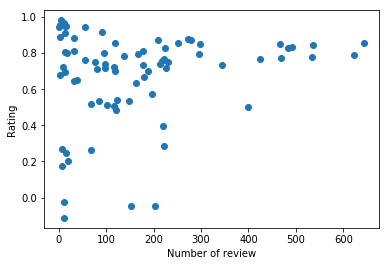

In [117]:
y = hotels_avg_data['Vader_score'].values
x = hotels_avg_data['review_counts'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Number of review')

Text(0.5,0,'Number of review')

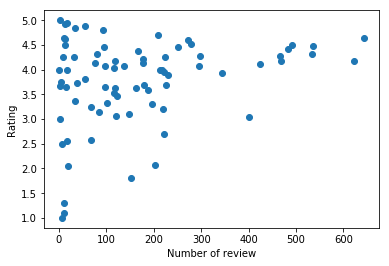

In [118]:
y = hotels_avg_data['ratingScore'].values
x = hotels_avg_data['review_counts'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Number of review')

Since in this case, each hotel is a single point on the scatterplot, just by comparing above plot for vader and rating scores we can say that vader is giving good predictions because the disribution of points are almost similar. One interesting observation is that for the hotels with avg.ratings around 1&2 vaders prediction is close to zero but not -1. So, for most of the clear positive reviews vader is also predicting good, but in cases where ratings is 1, the reviews might be sarcastic and hence vader might have predicting them close to zeros.